#  Yolo - You only look once Playground

This notebook presents you with a playground to learn about the Yolo object detector. We start by installing the yoloapi I created for this course. 

In [6]:
# This installs the yoloapi. You have to execute it each time you restart the vm.
#
!wget  https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/yoloapi.zip -P /content
!unzip /content/yoloapi.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


The yoloapi comes with a bunch of useful classes that will help us to learn about and work with the method. The ```yoloapi.public``` package is meant for public use while the ```yoloapi.private``` package is highly confidential and meant meant for reading. You are however allowed to have a glimpse to find some inspiration, but do not copy paste the code from there. 


### 1.1 Generating Test Data - ToyDatasetGenerator

This class provides methods for creating our toy-datasets. Use the ```help(yoloapi.public.data.ToyDatasetGenerator)``` method to get more info on all methods.  





In [ ]:
from yoloapi.public.data import ToyDatasetGenerator

# Create a generator for images with a size of 64x64 pixels
#
datagen = ToyDatasetGenerator(64,64) 

# Create 512 training images containing 1-3 objects, add a
# minimum noise level of 0 and a maximum noise level of 128.
#
train_data = datagen.generate_data(1,3,128, min_noise_level=0, 
                                    max_noise_level=128)

The output of generate_data() is a dictionary. The keys are 'X' and 'Y'. 'X' refers to the image data while 'Y' referes to the ground-truth of object bounding boxes:

* <code>train_data['X']</code>: A list of numpy.arrays of shape (rows, columns, channels). Each numpy.array holds the pixel data of an image. 
* <code>train_data['Y']</code>: A list of lists of tuples holding the ground-truth information for each image. 

To get the <b>n-th image</b> with the corresponding groundtruth we can simply index into each list.

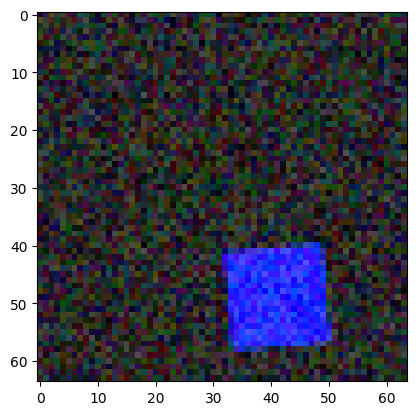

In [8]:
import matplotlib.pyplot as plt
plt.imshow(train_data['X'][0])

Within the ground-truth, each object is described by a tuple
<code>((x,y,w,h), array([c0,...,c1]))</code>:

* <code>(x,y,w,h)</code>: Describes the position and shape of the bounding box of the object in pixel coordinates and pixel-width/pixel-height.
* <code>array([c0,...,c1])</code>: Is a <b>one-hot-encoded</b> class label. Class 0 is encoded as <code>[1,0,0]</code>, class 1 as <code>[0,1,0]</code> and so one. 

In [9]:
train_data['Y'][0]

[((32, 40, 19, 19), array([1, 0, 0]))]


### 1.2 Visualizing Detected Objects - YoloVisualizer

The  class provides methods for visualizing detected objects. Use the ```help(yoloapi.public.data.visualize.YoloVisualizer)``` method to get more info on all methods. The class comes with three methods that are interesting:
* ```draw_bboxes_gt()``` - draws object based on groundtruth input
* ```draw_bboxes()``` - draws objects based on predicted objects in bounding box format (a list of tuples)
* ```draw_bboxes_tensor()``` - draws object based on the output of the yolo network (the output tensor) 

Notice: To use the latter two methods you will need a trained yolo network. 


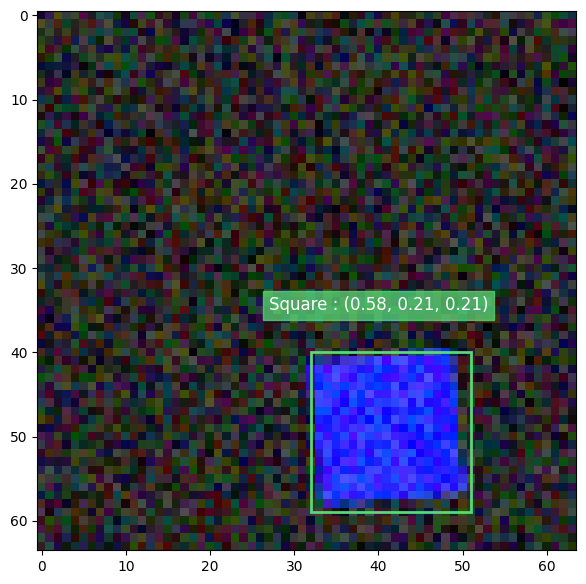

In [10]:
from yoloapi.public.visualize import YoloVisualizer

idx = 0
yolo_vis = YoloVisualizer((64,64))
yolo_vis.draw_bboxes_gt(train_data['X'][idx], train_data['Y'][idx])

## Exercise 1 - Understand the Groundtruth 

* Modify the groundtruth and visualize the effects. 
* Double check the format and try to understand each value. 

## 1.3 Converting from Groundtruth to Yolo Tensor - YoloBatchGenerator 

For training neural networks we will use the keras framework. To prepare the input data for training we will the YoloBatchGenerator. We do not implement it ourselves because of time constraints. Usually this would also be part of your job. The generator operates on the images that were created by the ToyDatasetGenerator. In this project we will use in-memory storage which is pretty fast and awesome. Usually this kind of data is stored on a fast hard drive due to memory restrictions.

We can use a convenience function ```encode_yolo()``` implemented in the ```YoloBatchGenerator``` to encode a list of ground-truth bounding boxes plus classes to a yolo-ground truth tensor. Notice that you will need the conf_t parameter or all predicted objects will be printed. 


[[[0.         0.         0.         0.         0.         0.
   0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.        ]]

 [[0.         0.         0.         0.         0.         0.
   0.         0.        ]
  [1.         0.40476191 0.40476191 1.09523809 1.09523809 0.
   1.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.        ]]

 [[0.         0.         0.         0.         0.         0.
   0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.        ]]]


<Figure size 640x480 with 0 Axes>

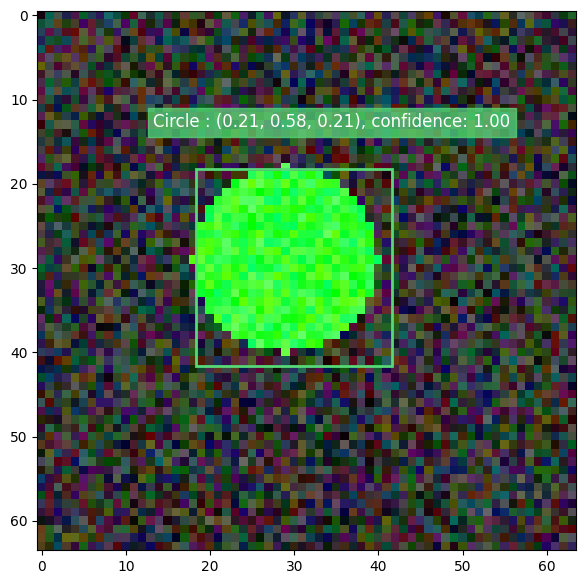

In [11]:
from yoloapi.public.data import YoloBatchGenerator
batch_generator = YoloBatchGenerator(train_data, n_cells = 3, batch_size = 32)


plt.figure()
idx = 10
yolo_tensor = batch_generator.encode_yolo(train_data['Y'][idx])

print(yolo_tensor)
yolo_vis.draw_bboxes_tensor(train_data['X'][idx], yolo_tensor, conf_t = 1)

You can also convert a yolo groundtruth-tensor back to a list of bounding boxes using the ```YoloUtils.convert_yolotensor_to_bboxes()``` method. 

In [12]:
from yoloapi.public.utils import YoloUtils
bboxes_converted = YoloUtils.convert_yolotensor_to_bboxes(yolo_tensor, img_shape=(64,64))
print("Yolo Tensor: ", yolo_tensor)
print("Bounding Boxes: ", bboxes_converted)

Yolo Tensor:  [[[0.         0.         0.         0.         0.         0.
   0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.        ]]

 [[0.         0.         0.         0.         0.         0.
   0.         0.        ]
  [1.         0.40476191 0.40476191 1.09523809 1.09523809 0.
   1.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.        ]]

 [[0.         0.         0.         0.         0.         0.
   0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.        ]]]
Bounding Boxes:  [(0.0, (0.0, 0.0, 0.0, 0.0), array([0., 0., 0.])), (0.0, (0.0, 21.333333333333332, 0.0, 0.0), array([0., 0., 0.])), (0.0, (0.0, 42.666666666666664, 0.0, 0.0), array([0., 0., 0.])),

## Exercise 2

* Try to understand how the yolo groundtruth tensor is encode. Compare it to the paper, can you spot a difference?
* How does the tensor change when you change the parameters such as n_cells ?
* How does the tensor encode positional and shape information as compared to the groundtruth ?

## Exercise 3 - Implement the Yolo-Loss 

By now you should have a solid understanding of how yolo constructs the groundtruth tensor, it is vital to know the encoding in order to implement the loss function in the next step. 

The Yolo loss is what makes this neural network a object detector. Instead of predicting a class label (classification) or a vector from within a real valued interval (regression) the Yolo network outputs a bounding box (defining the position and shape of an object), the class of an object and the confidence that the predicted bounding box is actually an object or not. 

As a consequence, the output is quite more complicated as we know it from more standard neural networks. We therefore can not simply use a standard loss function such as categorial crossentropy or squared error to train it. 

A slightly simplified Yolo-Loss function (we let each cell only predict a single object) looks like this:

$
\scriptsize
\begin{align}
    \mathcal{L}(z,\hat{z}) =  &\; \sum_n 1_{n}^{obj} \left(\sum_{i}(c_{i} - \hat{c}_{i})^2 \right) \\
                             & + \sum_n \;1_{n}^{obj} (O_n - \hat{O_n})^2 + \lambda_{noobj} \sum_n  1_{n}^{noobj} (O_n - \hat{O_n})^2 \\
                             & +  \sum_{n} 1_{n}^{obj} \left[ (x_n - \hat{x}_n)^2 + (y_n - \hat{y}_n)^2 \right] \\
                             & +  \sum_{n} 1_{n}^{obj} \left[ (\sqrt{w_n} - \sqrt{\hat{w}_n})^2 + (\sqrt{h_n} - \sqrt{\hat{h}_n})^2 \right].
\end{align}
$

where $c$ is a one-hot encoded vector representing the class of an object within cell $n$, $x_n,y_n,w_n, h_n$ are the position, width and height of the bounding box defining the object's position and shape and $O_n$ represents the confidence that there is actually an object within this cell.

Note that we predict bounding boxes all the time, we can not "not" predict them using this approach. We therefore mark these bounding boxes as valid or invalid using this $O_n$ confidence measure. 

There is another catch here, the $1_{n}^{obj}$ and $1_{n}^{noobj}$ functions. These functions output either 1 or 0. Depending if there is an object within the cell or not. We know this from the groundtruth. If there is no object within the cell, we do not care about the $x_n,y_n,w_n,h_n$ or the class of this non-object $c$ and therefore ignore the output of the network within the loss function ($1_{n}^{obj}$ will be 0). We only care that the network outputs a value as close as possible to 0 as $O_n$ indicating that there is no object within the cell $n$.

This is how the yolo groundtruth tensor looks like for a single image:
<center>
    <img src='https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/figures/yolo/yolo_groundtruth_single.png' width=400/>
</center>


Notice that we can only predict <code>bb_per_cell objects</code> per cell (in this figure 1 object per cell). The actual shape of this tensor depends on the number of cells (<code>n_cells</code>), the number of bounding boxes per cell (<code>bb_per_cell objects</code>) and the number of classes (<code>n_classes</code>). Also note that we only encode one set of classes labels per cell, this is a yolov1 restriction and means we can only predict one object type per cell. This was changed in later versions of yolo. 




In [13]:
# This cell creates a yolo groundtruth tensor for a single image. 
#
import numpy as np

n_cells = 3
bb_per_cell = 1
n_classes = 3

tensor_single = np.zeros((n_cells, n_cells, bb_per_cell * 5 + n_classes))

# Create a bounding box (notice that the real values would be normalized in a real yolo tensor)
#
tensor_single[0,1,:] = (1, 32, 23, 12, 16, 0, 1, 0)

But we can not use this <b>representation</b> for training the neural network in keras/tensorflow. These frameworks expects to see the groundtruth of all images in the entire input batch. This is for performance reasons. <br><br>

<center>
    <img src='https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/figures/yolo/yolo_groundtruth.png' width=400/>
</center>
<br>

So what we do is, create a 4-dimensional tensor using the <code>batch_size</code> as the first dimension and then copy in the tensors for each image into the corresponding image index. Notice that the visual representation does not neccessarily correspond to the actual layout in memory. Remember that the <b>last dimension</b> of the tensor is always a single vector (with memory-adjacent values), we can therefore access this last dimension most efficiently. That is why we use this layout. 

In [14]:
batch_size = 512

tensor_batch = np.zeros((batch_size, n_cells, n_cells, bb_per_cell * 5 + n_classes))
tensor_batch[0,:] = tensor_single # This is how we can set the entire tensor of the image 0 in the batch

To implement the loss function, we now need to operate on two batches of yolo groundtruth tensors in a single function. 

Let us revisite and break up the loss function: <br>
$
\scriptsize
\begin{align}
    \mathcal{L}(z,\hat{z}) =  &\; \sum_n 1_{n}^{obj} \left(\sum_{i}(c_{i} - \hat{c}_{i})^2 \right) \\
                             & + \sum_n \;1_{n}^{obj} (O_n - \hat{O_n})^2 + \lambda_{noobj} \sum_n  1_{n}^{noobj} (O_n - \hat{O_n})^2 \\
                             & +  \sum_{n} 1_{n}^{obj} \left[ (x_n - \hat{x}_n)^2 + (y_n - \hat{y}_n)^2 \right] \\
                             & +  \sum_{n} 1_{n}^{obj} \left[ (\sqrt{w_n} - \sqrt{\hat{w}_n})^2 + (\sqrt{h_n} - \sqrt{\hat{h}_n})^2 \right].
\end{align}
$

<br> 
The important thing here is, $z$ and $\hat{z}$ are tensors of shape <code>(batch_size, n_cells, n_cells, bb_per_cell * 5 + n_classes)</code>. The tensor $z$ represents our groundtruth, this is what we want the network to output while $\hat{z}$ is what it actually gave us as output. We can only use tensorflow (or numpy) functions to operate on these tensors, no loops or if statements are allowed. In the end our loss function must be a <b>differentiable</b> function. 

Also note, that we compute a single loss value for an entire batch of input data. Remember that
$(a_1+b_1+c_1+d_1) + \dots + (a_n+b_n+c_n+d_n) = (a_1 + \dots + a_n) + \dots + (d_1 + \dots + d_n)$ it is therefore easier to implement **each part** of the loss over the entire input batch and then add it up. That is what we are going to do.

The class below helps us create some data for implementing and testing our loss functions. Use this to figure out how to reshape and extract the relevant data for your loss computations.

In [15]:
from sklearn import preprocessing

class YoloLoss_Helper:
    def __init__(self, n_cells=7, bb_per_cell=1, n_classes=3):
        self.n_cells = n_cells
        self.bb_per_cell = bb_per_cell
        self.n_classes = n_classes
        
        self.label_encoder = preprocessing.LabelBinarizer()
        self.label_encoder.fit_transform(range(0,self.n_classes))
        
    '''
        This function creates a full groundtruth tensor for a single image with a single object. We 
        can use it to test our loss implementations. 
        Parameters:
            - cell_id is a tuple (i,j) defining the cell. 
            - conf is the object confidence ('O' in our loss function)
            - bounding box is a tuple (x,y,w,h) defining the bounding box
            - class label is a number between 0 and n_classes-1 which is then one-hot-encoded by the function
    '''
    def createSingleTensor(self, cell_id, conf = 1, bounding_box=(1,1,2,2), class_label = 0):
        
        assert class_label >= 0 and class_label < self.n_classes, 'PARAMETER: \'class_label\' must be >= 0 and < n_classes'
        assert cell_id[0] >= 0 and cell_id[0] < self.n_cells and cell_id[1] >= 0 and cell_id[1] < self.n_cells, \
                                                    'PARAMETER: \'cell_id\' must be within (0,0) and (n_cells-1, n_cells-1)'
        
        tensor = np.zeros((self.n_cells, self.n_cells, self.bb_per_cell * 5 + self.n_classes))
        
        # Fill in the class labels for cell (i,j)
        #
        (i,j) = cell_id
        
        # Create class data
        #
        class_data = np.zeros(self.n_classes)
        # Encode the class
        #
        c = self.label_encoder.transform([class_label])[0]
        class_data[:] = c

        # Create predictor data
        #
        pred_data = np.zeros(self.bb_per_cell * 5 + self.n_classes)
        pred_data[0] = conf
        pred_data[1:5] = bounding_box
        pred_data[5:] = class_data
        
        tensor[i, j] = pred_data
        
        return tensor
    
    '''
        Creates a batch tensor, and fills in the list of single tensors from 0 to len(singleTensors)-1.
        The default entries in the batch tensor will be 0.
    '''
    def createBatchTensor(self, batch_size, singleTensors = []):
        
        assert batch_size >= len(singleTensors), "PARAMETER: \'len(singleTensors)\' must be <= \'batch_size\'"
        
        tensor = np.zeros((batch_size, self.n_cells, self.n_cells, self.bb_per_cell * 5 + self.n_classes))
        
        for idx,singleTensor in enumerate(singleTensors):
            tensor[idx,:] = singleTensor
        
        return tensor

This is an example of how this class can be used to create some test tensors. 

In [16]:
import numpy as  np

yolohelper = YoloLoss_Helper(n_cells=3)
singleTensor1 = yolohelper.createSingleTensor((0,0), conf=0.5, bounding_box=(100,150,200,250), class_label = 2)
singleTensor2 = yolohelper.createSingleTensor((0,0), conf=0.75, bounding_box=(110,160,210,260), class_label = 1)

singleGT1 = yolohelper.createSingleTensor((0,0), conf=1, bounding_box=(100,150,200,250), class_label = 0)
singleGT2 = yolohelper.createSingleTensor((0,0), conf=1, bounding_box=(100,150,200,250), class_label = 1)

Z = yolohelper.createBatchTensor(2, [singleGT1, singleGT2])
Zhat = yolohelper.createBatchTensor(2, [singleTensor1, singleTensor2])

print(Z)
print(Zhat)

[[[[  1. 100. 150. 200. 250.   1.   0.   0.]
   [  0.   0.   0.   0.   0.   0.   0.   0.]
   [  0.   0.   0.   0.   0.   0.   0.   0.]]

  [[  0.   0.   0.   0.   0.   0.   0.   0.]
   [  0.   0.   0.   0.   0.   0.   0.   0.]
   [  0.   0.   0.   0.   0.   0.   0.   0.]]

  [[  0.   0.   0.   0.   0.   0.   0.   0.]
   [  0.   0.   0.   0.   0.   0.   0.   0.]
   [  0.   0.   0.   0.   0.   0.   0.   0.]]]


 [[[  1. 100. 150. 200. 250.   0.   1.   0.]
   [  0.   0.   0.   0.   0.   0.   0.   0.]
   [  0.   0.   0.   0.   0.   0.   0.   0.]]

  [[  0.   0.   0.   0.   0.   0.   0.   0.]
   [  0.   0.   0.   0.   0.   0.   0.   0.]
   [  0.   0.   0.   0.   0.   0.   0.   0.]]

  [[  0.   0.   0.   0.   0.   0.   0.   0.]
   [  0.   0.   0.   0.   0.   0.   0.   0.]
   [  0.   0.   0.   0.   0.   0.   0.   0.]]]]
[[[[  0.5  100.   150.   200.   250.     0.     0.     1.  ]
   [  0.     0.     0.     0.     0.     0.     0.     0.  ]
   [  0.     0.     0.     0.     0.     0.     0.   

## Exercise 3.1 - Implement the Class Loss

Let us look at the class loss first:<br><br>
$
\sum_n 1_{n}^{obj} \left(\sum_{i}(c_{i} - \hat{c}_{i})^2 \right) \\
$
<br>
This term ensures that the neural network will predict the correct class, if there is an object being predicted by <code>cell n</code>. If there is no object associated with <code>cell n</code>, $1_{n}^{obj}$ will be 0 and therefore this term will not have an impact on the overall loss. This makes sense, because we do not care what class the network predicts for a non-object. In the end the network can not predict a class that does not exist in our labels. 
<br>

So what we have to do is prepare the tensors such that we can compute the sum of squared differences between the entries that encode the class labels. Remember that the classes are <b>one-hot encoded</b>. This means for a 3 class problem, class 1 will be predicted as [1,0,0], class 2 will be predicted as [0,1,0] and so on. 
<br><br>
Our job is now to extract the class labels for each cell for each pair of corresponding images in the two tensors, and then compute the sum of squared differences between each of them. 
<br>


<center>
    <img src='https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/figures/yolo/tensor_index.png' width=600/>
</center>



In [17]:
# Implement the yolo class loss function. Have a look into the yoloapi.private.loss.YoloLossSimple class if you are stuck.
# Notice that you should only use tf functions to do so no loops or ifs. 
#
import tensorflow as tf

def yolo_class_loss_tf(Z, Zhat):
    tf.convert_to_tensor(np.array(-1,dtype='float64'))

You can test your implementation using the code in the cell below. 

In [19]:
from yoloapi.private.loss import YoloLossSimple

yolo_loss = YoloLossSimple(n_classes = 3)
loss_ref = yolo_loss.yolo_class_loss_tf(Z, Zhat)
loss_impl = yolo_class_loss_tf(Z, Zhat)

print(loss_ref)
print(loss_impl)


tf.Tensor(2.0, shape=(), dtype=float64)
tf.Tensor(2.0, shape=(), dtype=float64)


It is advised that you test this with more than a single tensor (you can use the generated groundtruth data to easily do so). 

## Exercise 3.2 - Implement the Confidence, Location and Shape Loss

* Implement the other parts of the loss function and test them. 
* If you are stuck have a look at yoloapi.private.loss.YoloLossSimple 

In [20]:
def yolo_confidence_loss_tf(Z, Zhat):
    return tf.convert_to_tensor(np.array(-1,dtype='float64'))

def yolo_location_loss_tf(Z, Zhat):
    return tf.convert_to_tensor(np.array(-1,dtype='float64'))
    
def yolo_shape_loss_tf(Z, Zhat):
    return tf.convert_to_tensor(np.array(-1,dtype='float64'))

    
    

In [21]:
# Test your code

## Exercise 4 - Combine your Loss Functions and Train your Model

At this point your loss is implemented and we only have to combine the function to be able to provide it to keras to train our model. 

In [23]:
def yolo_loss_tf(Z, Zhat):
    return yolo_class_loss_tf(Z,Zhat) + \
      yolo_confidence_loss_tf(Z, Zhat) + \
      yolo_location_loss_tf(Z, Zhat) + \
      yolo_shape_loss_tf(Z, Zhat)
 

In [24]:
from yoloapi.public.data import ToyDatasetGenerator
from yoloapi.public.data import YoloBatchGenerator

# Create a generator for images with a size of 64x64 pixels
#
datagen = ToyDatasetGenerator(64,64) 

# Create some training data, more could be better. 
#
train_data = datagen.generate_data(1,3,10*1024, min_noise_level=0, max_noise_level=128)
test_data = datagen.generate_data(1,3,512, min_noise_level=0, max_noise_level=128)

train_gen = YoloBatchGenerator(train_data, n_cells = 8)
test_gen = YoloBatchGenerator(test_data, n_cells = 8)

.................................................. 5000
.................................................. 10000
..Generated 10240 images in 21.20 seconds.
.....Generated 512 images in 1.30 seconds.


In [25]:
# Import the YoloModelFactory
#
from yoloapi.public.model_factory import YoloModelFactory

yolo_model = YoloModelFactory.create_2p3m_yolov1_model((64,64,3), 8, 3)
yolo_model.compile(optimizer='adam', loss = yolo_loss_tf)


In [ ]:
yolo_model.fit(train_gen, validation_data=test_gen, epochs = 100)

Epoch 1/100
20/20 [==============================] - 23s 942ms/step - loss: 4853.7173 - val_loss: 3311.1147
Epoch 2/100
20/20 [==============================] - 18s 905ms/step - loss: 1970.1914 - val_loss: 2142.4551
Epoch 3/100
20/20 [==============================] - 17s 848ms/step - loss: 1805.3344 - val_loss: 2059.4019
Epoch 4/100
20/20 [==============================] - 20s 976ms/step - loss: 1727.2885 - val_loss: 2006.8765
Epoch 5/100
20/20 [==============================] - 20s 997ms/step - loss: 1630.4535 - val_loss: 1733.6334
Epoch 6/100
20/20 [==============================] - 24s 1s/step - loss: 1566.1918 - val_loss: 1663.0927
Epoch 7/100
20/20 [==============================] - 24s 1s/step - loss: 1509.0398 - val_loss: 1703.7725
Epoch 8/100
18/20 [==========================>...] - ETA: 2s - loss: 1448.8827

## Exercise 5 - Validate your trained Model

Use your trained model and predict bounding boxes using the ToyDatagenerator. Why do you sometimes get multiple predictions per object?

In [ ]:
from yoloapi.public.validation import YoloValidation
from yoloapi.public.utils import YoloUtils
from yoloapi.public.visualize import YoloVisualizer

# Start with predicting the bounding boxes for all images in the test data.
#
predicted1 = YoloUtils.detect_objects(yolo_model, test_data['X'])

ind = 10
yolo_vis = YoloVisualizer((64,64))
yolo_vis.draw_bboxes_tensor(test_data['X'][ind], predicted1[ind], conf_t = 0.2)
